# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [5]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [6]:
data = pd.read_csv('train.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
data = data.drop(columns=['dropoff_datetime'])
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'])
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

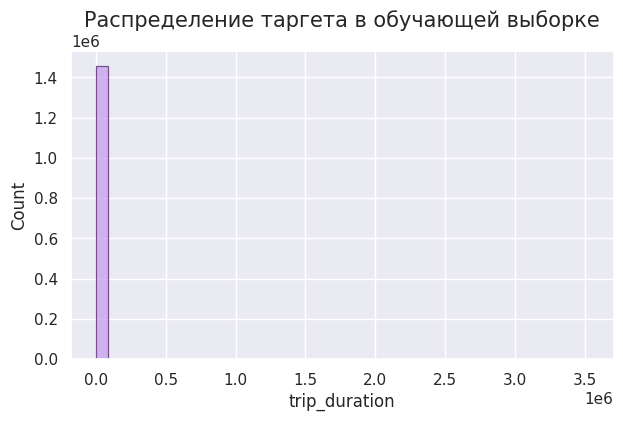

In [8]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Распределение таргета в обучающей выборке', fontsize=15)
sns.histplot(data.trip_duration,
             bins=40,
             ax=ax, 
             color='#c79fef',
             edgecolor='#764e8a');

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Есть выброс, из-за которого не видно остальные данные

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: RMSLE менее чувствительна к выбросам, а также обладает таким свойством, что за заниженные предсказания штрафы сильныее, чем за завышенные. При оценке времени поездки на такси это свойство оказывается к месту: если использовать эту модель в приложениях макси, в ситуации, когда фактическая длительность поездки окажется больше прогнозируемой, клиент будет недоволен. Также, возможно, выбран RMSLE, потому что длительности поездки могут существенно отличаться, поэтому нам важнее относительная ошибка, нежели абсолютная.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} 
- \log{(\exp(\hat{a}(x_i)) - 1) + 1)}\big)^2 = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2 $$ (в силу монотонности логарифмической и показательной функций)

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

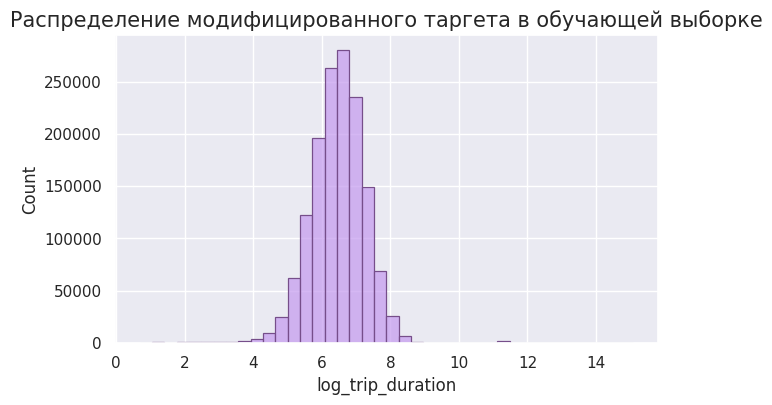

In [9]:
data['log_trip_duration'] = np.log1p(data['trip_duration'].values)
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Распределение модифицированного таргета в обучающей выборке', fontsize=15)
sns.histplot(data.log_trip_duration,
             bins=40,
             ax=ax,
             color='#c79fef',
             edgecolor='#764e8a');

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
best_constant = data.log_trip_duration.mean()

def rmsle(log1p_y_true, log1p_y_pred): 
    return np.sqrt(1/data.shape[0] * np.sum(np.square(log1p_y_true - log1p_y_pred)))

rmsle_best_const = rmsle(data.log_trip_duration, best_constant)

print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0.5, 1.0, 'Количество поездок в каждый из дней')

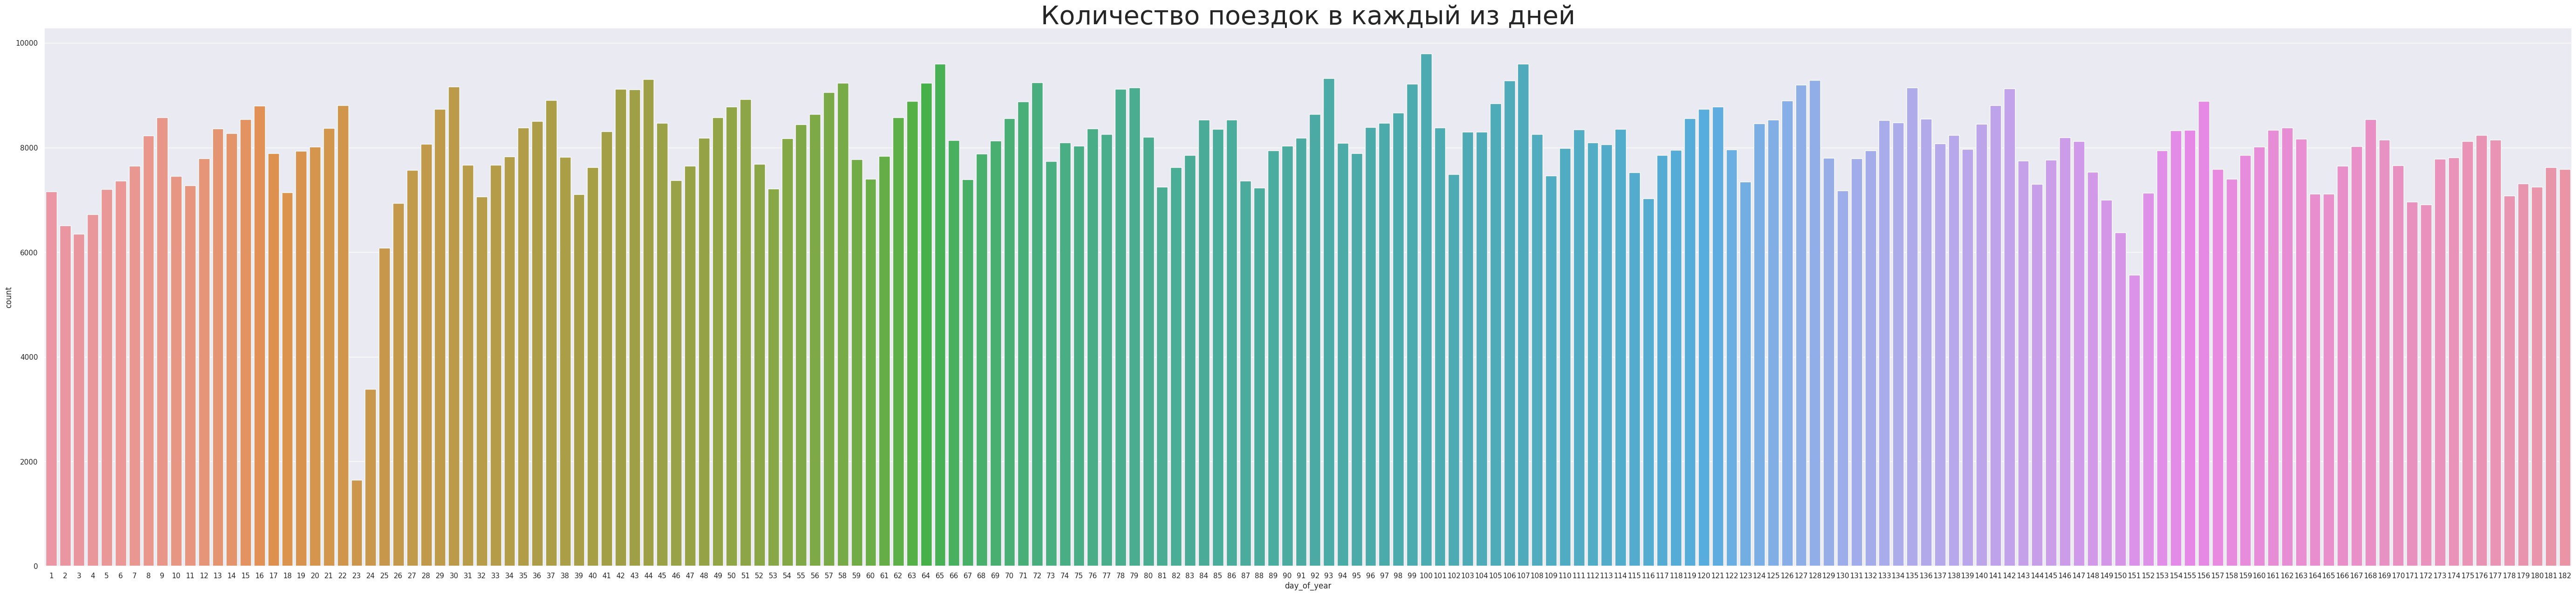

In [11]:
data['day_of_year'] = data['pickup_datetime'].dt.dayofyear

fig, ax = plt.subplots(figsize=(70, 15))
sns.countplot(x='day_of_year', data=data)
ax.set_title('Количество поездок в каждый из дней', fontsize=40)


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [12]:
date_count = data.groupby(by='day_of_year', as_index=False)[['id']].count()
subset = date_count[date_count['id'] < 6000]['day_of_year']
display(subset)

data[(data['day_of_year'] == 23) | (data['day_of_year'] == 24) | (data['day_of_year'] == 151)]['pickup_datetime'].dt.date.unique()

22      23
23      24
150    151
Name: day_of_year, dtype: int64

array([datetime.date(2016, 1, 23), datetime.date(2016, 1, 24),
       datetime.date(2016, 5, 30)], dtype=object)

**Ответ**: 23-24.01.2016 была сильнейшая метель (https://www.usatoday.com/story/weather/2016/01/23/blizzard-continues-slam-east-coast/79217258/)

30.05.2016 был Memorial Day (https://mashable.com/article/memorial-day-tributes)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

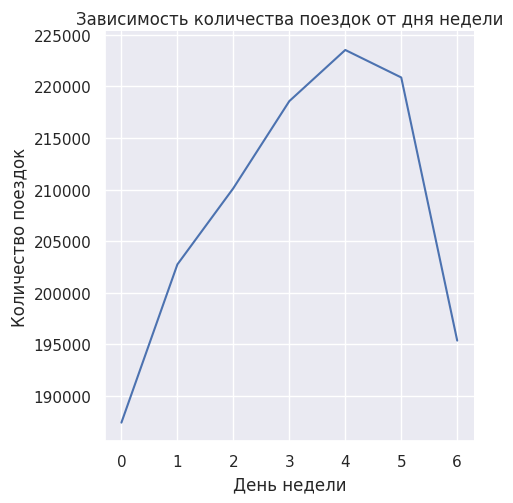

In [13]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
day_of_week_count = data.groupby(by='day_of_week', as_index=False).count()

ax = sns.relplot(x='day_of_week',
                 y='id',
                 kind='line',
                 data=day_of_week_count).set(title='Зависимость количества поездок от дня недели')
ax.set_axis_labels("День недели", "Количество поездок")

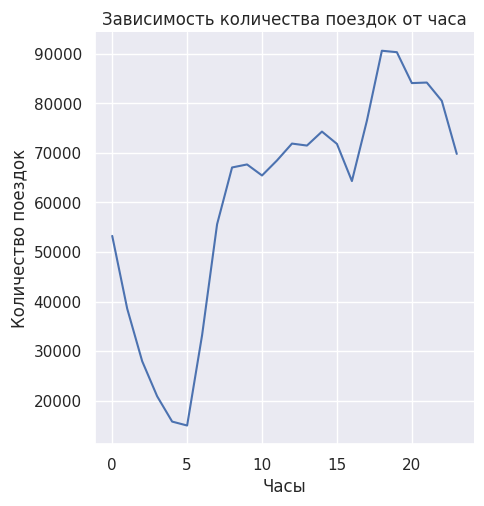

In [14]:
data['hour'] = data['pickup_datetime'].dt.hour
day_of_week_count = data.groupby(by='hour', as_index=False).count()


ax = sns.relplot(x='hour',
            y='id',
            kind='line',
            data=day_of_week_count).set(title='Зависимость количества поездок от часа')
ax.set_axis_labels("Часы", "Количество поездок")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

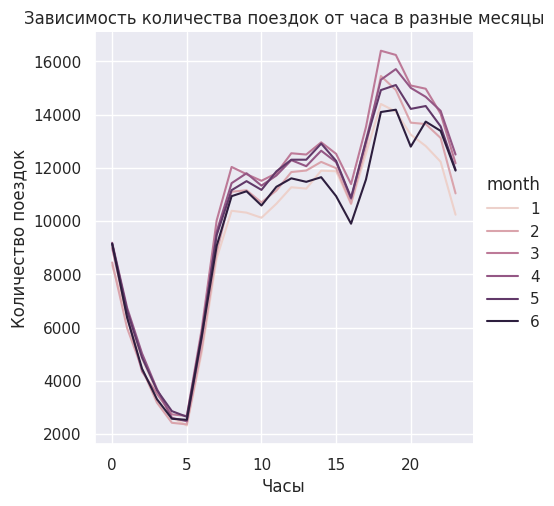

In [15]:
data['month'] = data['pickup_datetime'].dt.month
day_of_week_count = data.groupby(['hour', 'month'], as_index=False).count()
# display(day_of_week_count.sample(5))
ax = sns.relplot(x='hour',
            y='id',
            hue='month',
            kind='line',
            data=day_of_week_count).set(title='Зависимость количества поездок от часа в разные месяцы')
ax.set_axis_labels("Часы", "Количество поездок")

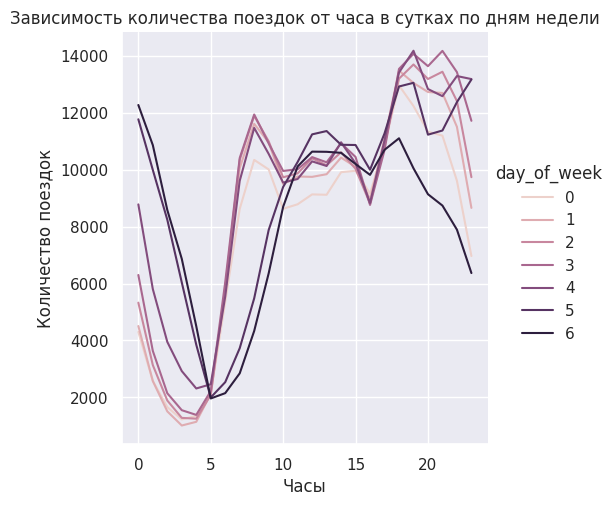

In [16]:
day_of_week_count = data.groupby(['hour', 'day_of_week'], as_index=False).count()
# display(day_of_week_count.sample(5))
ax = sns.relplot(x='hour',
            y='id',
            hue='day_of_week',
            kind='line',
            data=day_of_week_count).set(title='Зависимость количества поездок от часа в сутках по дням недели')
ax.set_axis_labels("Часы", "Количество поездок")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Между разными месяцами большой  разницы в количестве поездок нет, особенно ночью, днем немного больше поездок было в весенние месяцы.
По дням недели разброс больший. В ночное время больше всего поездок было в выходные дни, а в утреннее - в будние. Скорее всего, это связано с тем, что в выходные дни большинству людей не нужно на работу, поэтому люди могут позволить себе возвращение домой поздно ночью. В будние дни утром, вероятно, большинство поздок было до работы. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [17]:
from sklearn.model_selection import train_test_split

y = data["log_trip_duration"]
# X = data
X = data.drop(columns=["log_trip_duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [18]:
data_train = pd.concat([X_train, y_train], axis=1)

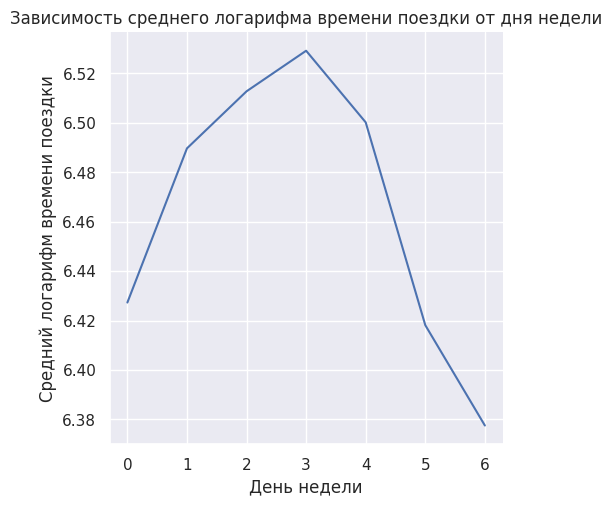

In [19]:
day_of_week_mean = data_train.groupby(['day_of_week'], as_index=False).mean(numeric_only=True)
ax = sns.relplot(x='day_of_week',
            y='log_trip_duration',
            kind='line',
            data=day_of_week_mean).set(title='Зависимость среднего логарифма времени поездки от дня недели')
ax.set_axis_labels("День недели", "Средний логарифм времени поездки")

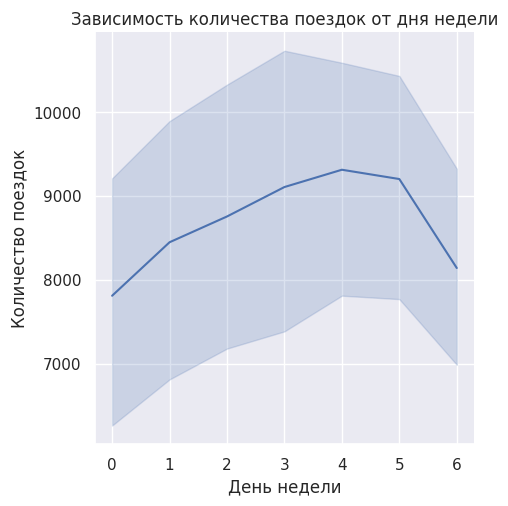

In [20]:
ax = sns.relplot(x='day_of_week',
                 y='id',
                 kind='line',
                 data=day_of_week_count).set(title='Зависимость количества поездок от дня недели')
ax.set_axis_labels("День недели", "Количество поездок")

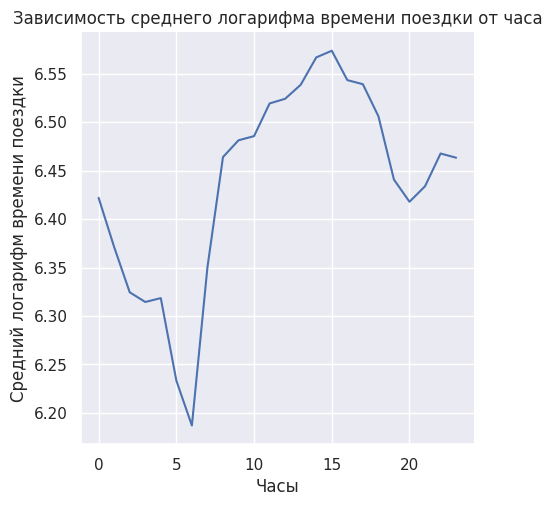

In [21]:
hour_mean = data_train.groupby(['hour'], as_index=False).mean(numeric_only=True)
ax = sns.relplot(x='hour',
            y='log_trip_duration',
            kind='line',
            data=hour_mean).set(title='Зависимость среднего логарифма времени поездки от часа')
ax.set_axis_labels("Часы", "Средний логарифм времени поездки")

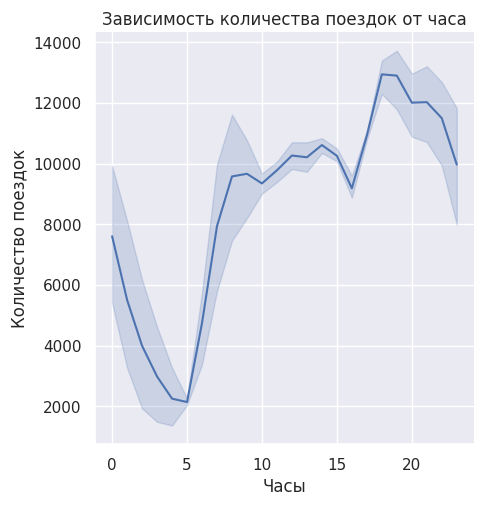

In [22]:
ax = sns.relplot(x='hour',
            y='id',
            kind='line',
            data=day_of_week_count).set(title='Зависимость количества поездок от часа')
ax.set_axis_labels("Часы", "Количество поездок")

Text(0.5, 1.0, 'Зависимость среднего логарифма времени поездки от дня в году')

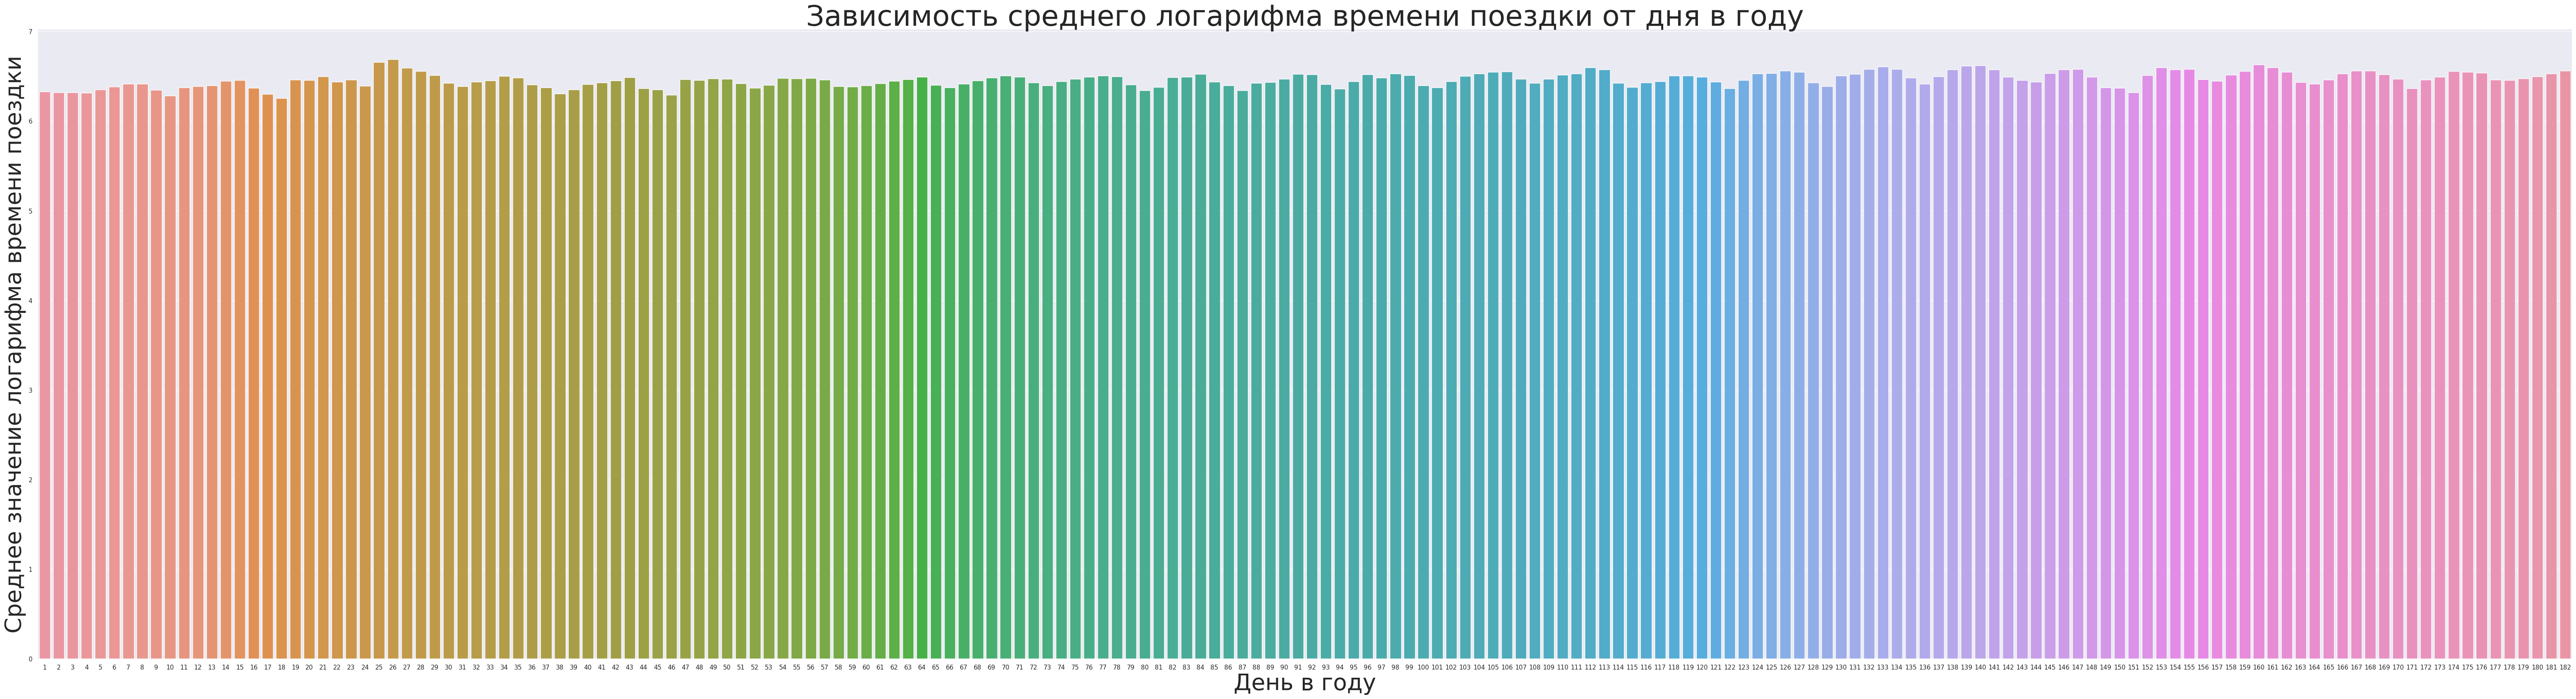

In [23]:
day_of_year_mean = data_train.groupby(['day_of_year'], as_index=False).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(80, 20))

ax = sns.barplot(data=day_of_year_mean, x="day_of_year", y="log_trip_duration")
plt.xlabel('День в году', fontsize=40)
plt.ylabel('Среднее значение логарифма времени поездки', fontsize=40)
plt.title('Зависимость среднего логарифма времени поездки от дня в году', fontsize=50)

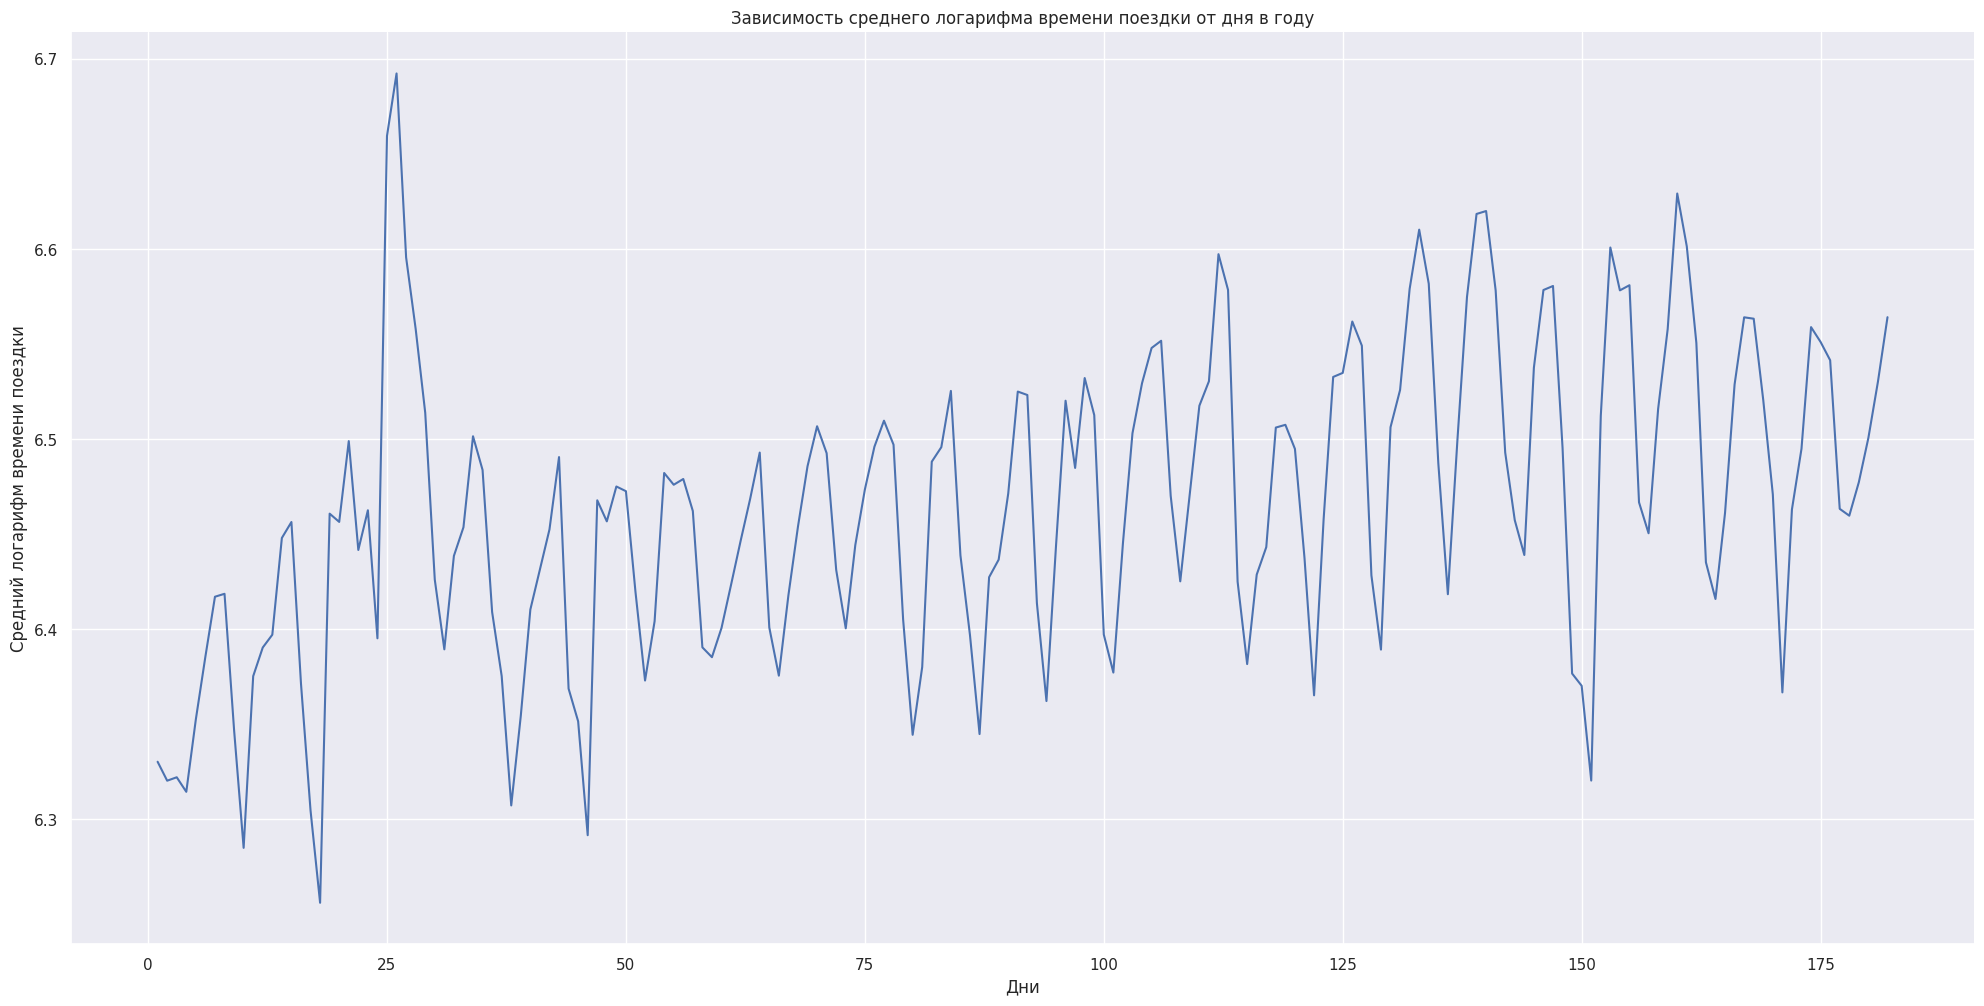

In [24]:
day_of_year_mean = data_train.groupby(['day_of_year'], as_index=False).mean(numeric_only=True)

ax = sns.relplot(x='day_of_year',
            y='log_trip_duration',
            kind='line',
            height=10, aspect=2,
            data=day_of_year_mean).set(title='Зависимость среднего логарифма времени поездки от дня в году')
ax.set_axis_labels("Дни", "Средний логарифм времени поездки")

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: 
1. Некоторое сходство есть. В аномальные периоды средний таргет не сильно выделяется.
2. Наблюдается периодичность, связанная с днями недели. От номера дня в году, как будто, мало что зависит

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [25]:
# День недели, месяц, час и номер дня в году уже были добавлены выше

#Добавим два бинарных признака is_snowstorm и is_memorial_day соответствующие аномальным периодам (23-24.01.2016 и 30.05.2016)
def is_snowstorm(day):
    return (day == 23) | (day == 24)

X_train['is_snowstorm'] = is_snowstorm(X_train['day_of_year']).astype(int)
X_test['is_snowstorm'] = is_snowstorm(X_test['day_of_year']).astype(int)

def is_memorial_day(day):
    return day == 151

X_train['is_memorial_day'] = is_memorial_day(X_train['day_of_year']).astype(int)
X_test['is_memorial_day'] = is_memorial_day(X_test['day_of_year']).astype(int)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Час, день недели, месяц стоит считать категориальными, так так само значение числа тут роли не играет, его можно рассматривать как название категории. Номер дня в году тоже, скорее, относится к категориальном, но при one-hot кодировании в общем случае добавится аж 365 признаков. При этом, казалось бы, таргет не сильно зависит от дня в году (гораздо больше зависимость от дня недели). Попробуем обучить модель и так, и так.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [26]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day'])

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day'])
numeric_features = list([])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7865


In [28]:
categorical = list(['day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day'])
numeric_features = list(['day_of_year'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7874


Получились похожие значения, немного лучше, если считать day_of_year категориальным признаком

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [29]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [30]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [31]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Точки, соответствующие аэропортам Джона Кеннеди, Ла-Гвардия и Ньюарк. Они находятся в отдалении от города, но в них и из них часто ездят на такси. Для них длительность поездки может отличаться, например, из-за пробок на дороге в аэропорт.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [32]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

X_train['haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_test['haversine'] = haversine_array(X_test['pickup_latitude'].values, X_test['pickup_longitude'].values, X_test['dropoff_latitude'].values, X_test['dropoff_longitude'].values)


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [33]:
X_train['log_haversine'] = np.log1p(X_train['haversine'].values)
X_test['log_haversine'] = np.log1p(X_test['haversine'].values)

In [34]:
data['haversine'] = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)
data['log_haversine'] = np.log1p(data['haversine'].values)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [35]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

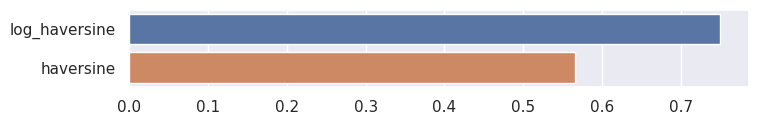

In [36]:
correlations = X_train[['haversine','log_haversine']].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 1)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [37]:
X_train['avg_speed'] = np.divide(X_train['haversine'].values, X_train['trip_duration'].values)

X_train.sample(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_year,day_of_week,hour,month,is_snowstorm,is_memorial_day,haversine,log_haversine,avg_speed
1453642,id0886227,1,2016-01-30 18:04:41,1,-73.984673,40.764973,-73.979034,40.752415,N,596,30,5,18,1,0,0,1.474923,0.906209,0.002475
1244206,id3527147,1,2016-04-12 23:31:04,3,-74.003395,40.740948,-74.007355,40.741150,N,126,103,1,23,4,0,0,0.334353,0.288446,0.002654
107438,id0360339,1,2016-04-05 18:45:11,1,-73.971519,40.760765,-73.985931,40.744820,N,483,96,1,18,4,0,0,2.148823,1.147029,0.004449
434435,id2169359,1,2016-06-14 21:22:11,1,-73.958038,40.776417,-73.964111,40.803162,N,788,166,1,21,6,0,0,3.017519,1.390665,0.003829
1419109,id2038665,1,2016-06-20 13:50:05,1,-73.979172,40.765205,-73.983551,40.741417,N,1174,172,0,13,6,0,0,2.670752,1.300397,0.002275


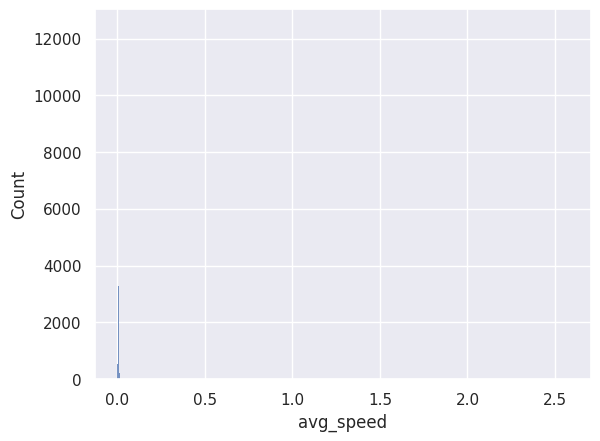

In [38]:
sns.histplot(data=X_train, x='avg_speed');

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [39]:
qntl = X_train["avg_speed"].quantile(.8)
avg_speed_less_qntl = X_train[X_train["avg_speed"] < qntl]

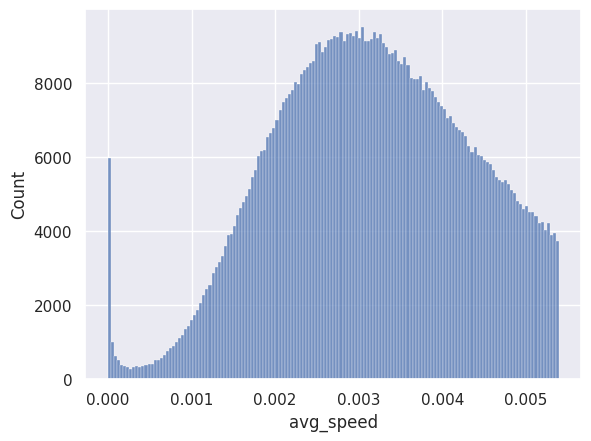

In [40]:
sns.histplot(data=avg_speed_less_qntl, x='avg_speed');

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,0.005648,0.005615,0.005816,0.005746,0.006564,0.006583,0.005223,0.004030,0.003211,0.002988,...,0.003157,0.003197,0.003328,0.003327,0.003380,0.003811,0.004256,0.004430,0.004499,0.004936
1,0.005211,0.005560,0.005693,0.005931,0.006471,0.006376,0.005044,0.003764,0.002901,0.002657,...,0.002752,0.002780,0.002965,0.003017,0.003054,0.003477,0.003909,0.004099,0.004324,0.004660
2,0.004986,0.005415,0.005573,0.005670,0.006304,0.006279,0.005077,0.003731,0.002900,0.002652,...,0.002665,0.002673,0.002910,0.002891,0.002961,0.003276,0.003769,0.004011,0.004111,0.004455
3,0.004818,0.005272,0.005478,0.005871,0.006314,0.006156,0.005125,0.003751,0.002885,0.002683,...,0.002678,0.002725,0.002900,0.002940,0.002942,0.003218,0.003618,0.003778,0.003863,0.004144
4,0.004450,0.004829,0.004978,0.005231,0.005755,0.006400,0.005237,0.003867,0.003014,0.002732,...,0.002941,0.002878,0.003046,0.003091,0.003095,0.003197,0.003510,0.003601,0.003619,0.003725
5,0.003916,0.004317,0.004512,0.004834,0.005304,0.006220,0.006094,0.005418,0.004749,0.004243,...,0.003374,0.003347,0.003393,0.003358,0.003249,0.003123,0.003363,0.003559,0.003541,0.003720
6,0.003973,0.004296,0.004589,0.004867,0.005197,0.006086,0.006660,0.005930,0.005157,0.004813,...,0.003637,0.003667,0.003663,0.003724,0.003701,0.003938,0.004261,0.004509,0.004791,0.005147


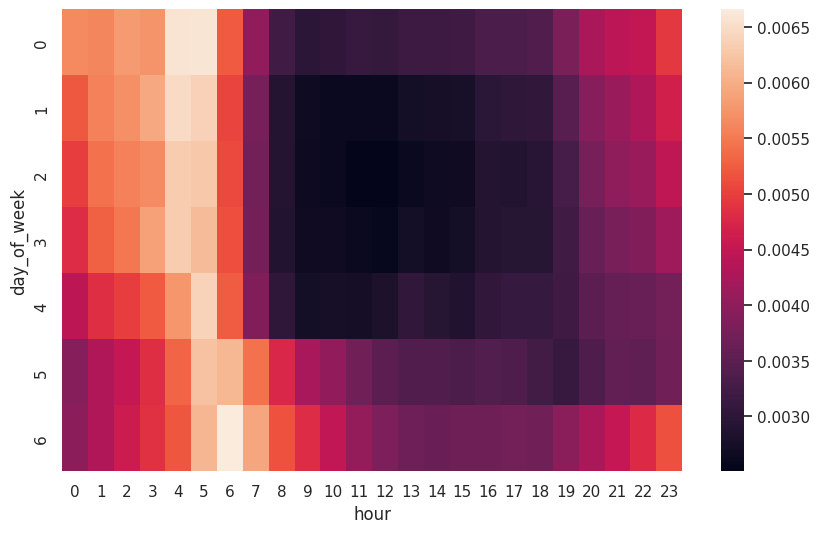

In [41]:
dh = pd.pivot_table(data=X_train, index='day_of_week', columns='hour', values='avg_speed', aggfunc='median')
display(dh)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(dh, ax=ax);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что она зависит от продолжительности поездки, ее можно посчитать, только заранее зная таргет

In [42]:
X_train = X_train.drop(columns='avg_speed')

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость минимальна с 9 до 12 со вторника по пятницу и с 13 до 15 со вторника по четверг. Скорость максимальна в 4 утра с пн по чт, в 5 утра всю неделю и в 6 утра в выходные

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [43]:
def is_traffic_jam(hour, day):
    return (hour >= 9) & (hour <= 12) & (day >= 1) & (day <= 4) | (hour >= 13) & (hour <= 15) & (day >= 1) & (day <= 3)

X_train['is_traffic_jam'] = is_traffic_jam(X_train['hour'], X_train['day_of_week']).astype(int)
X_test['is_traffic_jam'] = is_traffic_jam(X_test['hour'], X_test['day_of_week']).astype(int)


def is_empty_road(hour, day):
    return (hour == 4) & (day >= 0) & (day <= 3) | (hour == 5) | (hour == 6) & (day >= 5) & (day <= 6)

X_train['is_empty_road'] = is_empty_road(X_train['hour'], X_train['day_of_week']).astype(int)
X_test['is_empty_road'] = is_empty_road(X_test['hour'], X_test['day_of_week']).astype(int)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Признаки могут быть полезны, потому что длительность поездки до этих пунктов может зависеть от других параметров.

In [44]:
#John Kennedy Airport
def is_in_JFKA(lat, lng):
    return (lng >= -73.82366180419922) & (lng <= -73.74641418457031) & (lat >= 40.622812957398224) & (lat <= 40.66475414828327)

X_train['is_pickup_in_JFKA'] = is_in_JFKA(X_train['pickup_latitude'], X_train['pickup_longitude']).astype(int)
X_test['is_pickup_in_JFKA'] = is_in_JFKA(X_test['pickup_latitude'], X_test['pickup_longitude']).astype(int)

X_train['is_dropoff_in_JFKA'] = is_in_JFKA(X_train['dropoff_latitude'], X_train['dropoff_longitude']).astype(int)
X_test['is_dropoff_in_JFKA'] = is_in_JFKA(X_test['dropoff_latitude'], X_test['dropoff_longitude']).astype(int)

# show_circles_on_map(X_train[X_train['is_pickup_in_JFKA'] == False].sample(1000), "pickup_latitude", "pickup_longitude", "blue")
# show_circles_on_map(X_train[X_train['is_dropoff_in_JFKA'] == True], "dropoff_latitude", "dropoff_longitude", "red")

In [45]:
#LaGuardia Airport
def is_in_LGA(lat, lng):
    return (lng >= -73.88991951976053) & (lng <= -73.8547289374852) & (lat >= 40.76582110238161) & (lat <= 40.780900980501)

X_train['is_pickup_in_LGA'] = is_in_LGA(X_train['pickup_latitude'], X_train['pickup_longitude']).astype(int)
X_test['is_pickup_in_LGA'] = is_in_LGA(X_test['pickup_latitude'], X_test['pickup_longitude']).astype(int)

X_train['is_dropoff_in_LGA'] = is_in_LGA(X_train['dropoff_latitude'], X_train['dropoff_longitude']).astype(int)
X_test['is_dropoff_in_LGA'] = is_in_LGA(X_test['dropoff_latitude'], X_test['dropoff_longitude']).astype(int)

# show_circles_on_map(X_train[X_train['is_pickup_in_JFKA'] == False].sample(1000), "pickup_latitude", "pickup_longitude", "blue")
# show_circles_on_map(X_train[X_train['is_dropoff_in_LGA'] == True], "dropoff_latitude", "dropoff_longitude", "red")

In [46]:
#Newark Airport
def is_in_Newark(lat, lng):
    return (lng >= -74.190673828125) & (lng <= -74.15582656860352) & (lat >= 40.67308714572936) & (lat <= 40.70731962476411)

X_train['is_pickup_in_NA'] = is_in_Newark(X_train['pickup_latitude'], X_train['pickup_longitude']).astype(int)
X_test['is_pickup_in_NA'] = is_in_Newark(X_test['pickup_latitude'], X_test['pickup_longitude']).astype(int)

X_train['is_dropoff_in_NA'] = is_in_Newark(X_train['dropoff_latitude'], X_train['dropoff_longitude']).astype(int)
X_test['is_dropoff_in_NA'] = is_in_Newark(X_test['dropoff_latitude'], X_test['dropoff_longitude']).astype(int)

# show_circles_on_map(X_train[X_train['is_pickup_in_NA'] == False].sample(1000), "pickup_latitude", "pickup_longitude", "blue")
# show_circles_on_map(X_train[X_train['is_dropoff_in_NA'] == True], "dropoff_latitude", "dropoff_longitude", "red")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [47]:
data_train = pd.concat([X_train, y_train], axis=1)

<AxesSubplot: xlabel='is_pickup_in_JFKA', ylabel='log_trip_duration'>

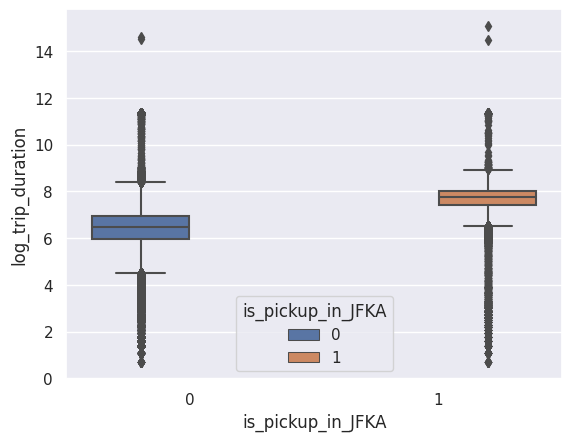

In [48]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_pickup_in_JFKA", hue="is_pickup_in_JFKA")

<AxesSubplot: xlabel='is_dropoff_in_JFKA', ylabel='log_trip_duration'>

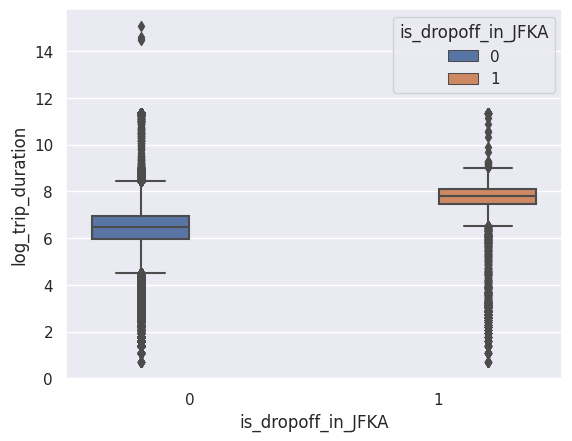

In [49]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_dropoff_in_JFKA", hue="is_dropoff_in_JFKA")

<AxesSubplot: xlabel='is_pickup_in_LGA', ylabel='log_trip_duration'>

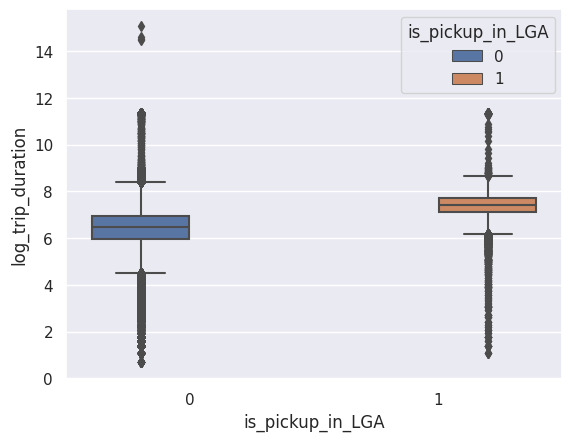

In [50]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_pickup_in_LGA", hue="is_pickup_in_LGA")


<AxesSubplot: xlabel='is_dropoff_in_LGA', ylabel='log_trip_duration'>

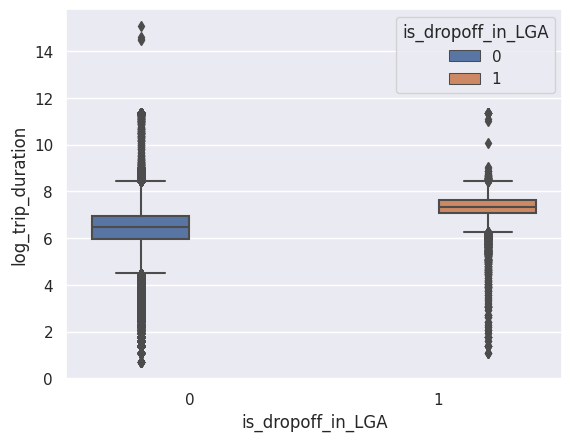

In [51]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_dropoff_in_LGA", hue="is_dropoff_in_LGA")

<AxesSubplot: xlabel='is_pickup_in_NA', ylabel='log_trip_duration'>

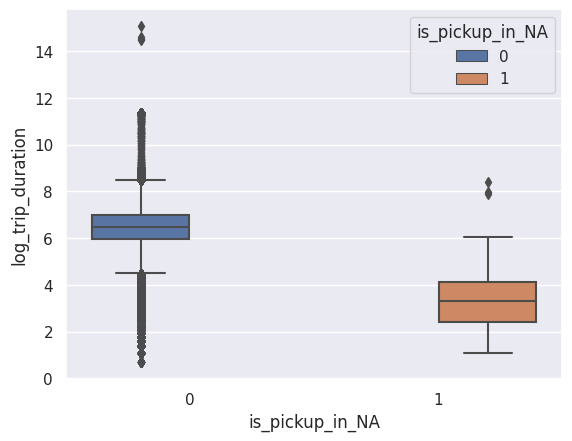

In [52]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_pickup_in_NA", hue="is_pickup_in_NA")

<AxesSubplot: xlabel='is_dropoff_in_NA', ylabel='log_trip_duration'>

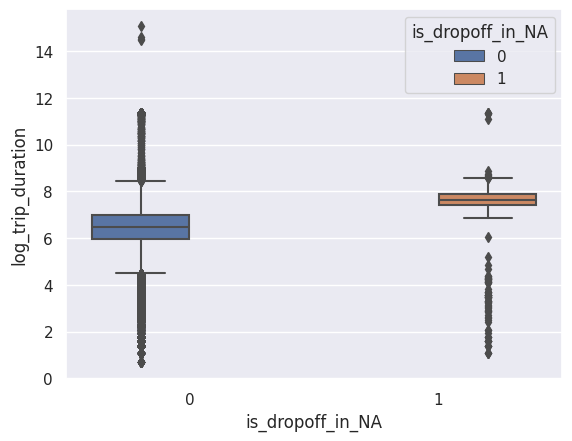

In [53]:
sns.boxplot(data=data_train, y="log_trip_duration", x="is_dropoff_in_NA", hue="is_dropoff_in_NA")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: судя по тому, что распределения сильно отличаются, признаки хорошие.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin
from math import floor


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

#Разделим на ячейки следующим образом: одно деление будет соответствовать одной цифре после
# decimal_point после запятой (по умолчанию третьей цифре после запятой)
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, decimal_point=2):
        self.lng_min = 0
        self.lng_max = 0
        self.ltd_min = 0
        self.ltd_max = 0
        self.multiplier = 10 ** decimal_point
        
        self.m = 0
        self.n = 0
    
    def show_map(self):
        # you may want to visualize cells
        m = folium.Map()
        lat_interval = 10
        lon_interval = 10
        grid = []

        for lat in range(int(self.ltd_min * self.multiplier), int(self.ltd_max * self.multiplier), lat_interval):
            grid.append([[lat / (self.multiplier * self.multiplier), -180],[lat / (self.multiplier * self.multiplier), 180]])

        for lon in range(int(self.lng_min * self.multiplier), int(self.lng_max * self.multiplier), lon_interval):
            grid.append([[-90, lon / (self.multiplier * self.multiplier)],[90, lon / (self.multiplier * self.multiplier)]])

        for g in grid:
            folium.PolyLine(g, color="black", weight=0.5, opacity=0.5).add_to(m)
        
        return m
        
        
#         pass
    
    def fit(self, X=None, y=None):
        self.lng_min = self._get_min((X['pickup_longitude'].quantile(.001)), (X['dropoff_longitude'].quantile(.001)))
        self.lng_max = self._get_max(X['pickup_longitude'].quantile(.999), X['dropoff_longitude'].quantile(.999))
        
        self.ltd_min = self._get_min(X['pickup_latitude'].quantile(.001), X['dropoff_latitude'].quantile(.001))
        self.ltd_max = self._get_max(X['pickup_latitude'].quantile(.999), X['dropoff_latitude'].quantile(.999))
        
        self.m = self.ltd_max - self.ltd_min - 1
        self.n = self.lng_max - self.lng_min - 1
        
        return self
    
    def _get_min(self, x, y):
        return floor(min(x, y) * self.multiplier)
    def _get_max(self, x, y):
        return floor(max(x, y) * self.multiplier)
    
    def _get_i_j(self, ltd, lng):
        return ((np.floor(ltd * self.multiplier) - self.ltd_min).astype(int), (np.floor(lng * self.multiplier) - self.lng_min).astype(int))
    
    def _get_coordinate(self, i, j):
        return np.where((0 <= i) & (i < self.m) & (0 <= j) & (j < self.n), i * self.n + j, -1)

    def transform(self, X, y=None):
        print()
        X['pickup_coordinate'] = self._get_coordinate(self._get_i_j(X['pickup_latitude'], X['pickup_longitude'])[0], self._get_i_j(X['pickup_latitude'], X['pickup_longitude'])[1])
        X['dropoff_coordinate'] = self._get_coordinate(self._get_i_j(X['dropoff_latitude'], X['dropoff_longitude'])[0], self._get_i_j(X['dropoff_latitude'], X['dropoff_longitude'])[1])

        return X
    
transformer = MapGridTransformer(2)
transformer.fit(X_train)
X = transformer.transform(X_train)


transformer.fit(X_test)
X = transformer.transform(X_test)

# display(X_train.loc[X_train['pickup_coordinate'] > 0, 'pickup_coordinate'].max())
X_train['pickup_coordinate'].sort_values().unique().shape[0]

554

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [56]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'log_haversine', 'is_traffic_jam', 'is_empty_road', 'is_pickup_in_LGA',
                 'is_dropoff_in_LGA',
                 'is_pickup_in_NA','is_dropoff_in_NA','is_pickup_in_JFKA','is_dropoff_in_JFKA',
                'pickup_coordinate', 'dropoff_coordinate'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'is_traffic_jam',  'is_empty_road', 'is_pickup_in_NA',
                    'is_pickup_in_LGA', 'is_dropoff_in_LGA',
                    'is_dropoff_in_NA', 'is_pickup_in_JFKA','is_dropoff_in_JFKA'
                   ])

numeric_features = list(['log_haversine', 'pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4849


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: от vendor_id может зависеть класс автомобиля. Возможно, для длительных поездок чаще выбирают автомобили более высокого класса, поэтому у определенных vendor_id длительности могут быть больше.
От количества пассажиров длительность тоже может зависеть. Для длительных поездок выгоднее объединяться, чтобы сэкономить. Также поездки в аэропорт люди часто едут не по одному, а с семьей или друзями.
Наличие записи поездки также потенциально может влиять на длительность. Например, если записи нет, водитель может как-то пытаться обмануть клиента, искусственно увеличив длительность, чтобы больше заработать. Или же наоборот как-то договориться с клиентом, занизив "официальный" показатель.


Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [57]:
display(data['vendor_id'].unique())
display(data['passenger_count'].unique())
display(data['store_and_fwd_flag'].unique())

array([2, 1])

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

array(['N', 'Y'], dtype=object)

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<AxesSubplot: xlabel='vendor_id', ylabel='log_trip_duration'>

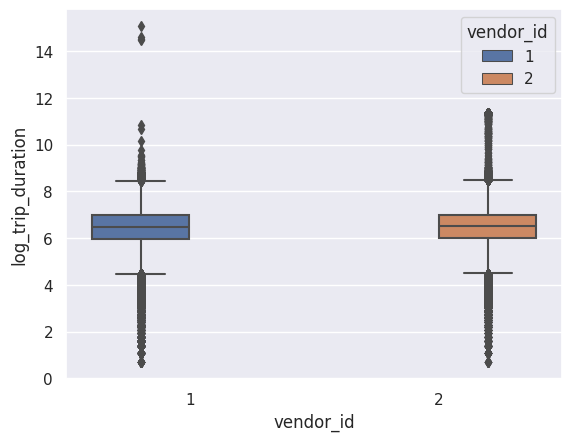

In [58]:
sns.boxplot(data=data_train, y="log_trip_duration", x="vendor_id", hue="vendor_id")

<AxesSubplot: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

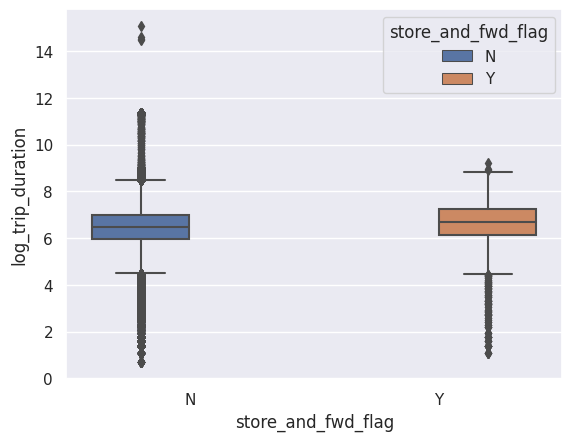

In [59]:
sns.boxplot(data=data_train, y="log_trip_duration", x="store_and_fwd_flag", hue="store_and_fwd_flag")

<AxesSubplot: xlabel='passenger_count', ylabel='log_trip_duration'>

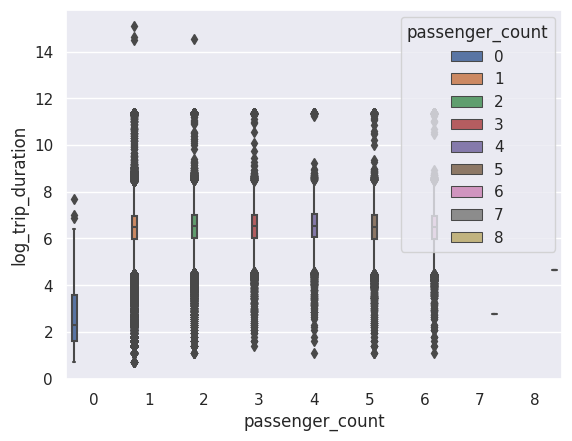

In [60]:
sns.boxplot(data=data_train, y="log_trip_duration", x="passenger_count", hue="passenger_count")

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [61]:
X_train['vendor_id'] = X_train['vendor_id'].replace({2 : 0})
X_test['vendor_id'] = X_test['vendor_id'].replace({2 : 0})

X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: распределения не сильно отличаются, но немного улучшить модель эти признаки могут.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [62]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'log_haversine', 'is_traffic_jam', 'is_empty_road',
                 'is_pickup_in_NA','is_dropoff_in_NA','is_pickup_in_JFKA',
                 'is_pickup_in_LGA', 'is_dropoff_in_LGA',
                 'is_dropoff_in_JFKA', 'vendor_id', 'passenger_count', 
                 'store_and_fwd_flag', 'pickup_coordinate', 'dropoff_coordinate'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'is_traffic_jam',  'is_empty_road', 'is_pickup_in_NA',
                    'is_pickup_in_LGA','is_dropoff_in_LGA',
                    'is_dropoff_in_NA', 'is_pickup_in_JFKA','is_dropoff_in_JFKA',
                    'vendor_id', 'store_and_fwd_flag'])

numeric_features = list(['log_haversine', 'passenger_count', 'pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_train_pred = model.predict(X_train[features])
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4847


In [63]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'log_haversine', 'is_traffic_jam', 'is_empty_road',
                 'is_pickup_in_NA','is_dropoff_in_NA','is_pickup_in_JFKA',
                 'is_pickup_in_LGA', 'is_dropoff_in_LGA',
                 'is_dropoff_in_JFKA', 'passenger_count', 'store_and_fwd_flag',
                'pickup_coordinate', 'dropoff_coordinate'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 'is_snowstorm',
       'is_memorial_day', 'is_traffic_jam',  'is_empty_road', 'is_pickup_in_NA',
                    'is_pickup_in_LGA', 'is_dropoff_in_LGA',
                    'is_dropoff_in_NA', 'is_pickup_in_JFKA','is_dropoff_in_JFKA',
                    'store_and_fwd_flag'])

numeric_features = list(['log_haversine', 'passenger_count','pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4847


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Ответ:** 'passenger_count' и 'store_and_fwd_flag' дают улучшение на 0.0001, а 'vendor_id' вообще никакого, поэтому удалим их из обучающей выборки.

In [64]:
X_train = X_train.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])
X_test = X_test.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

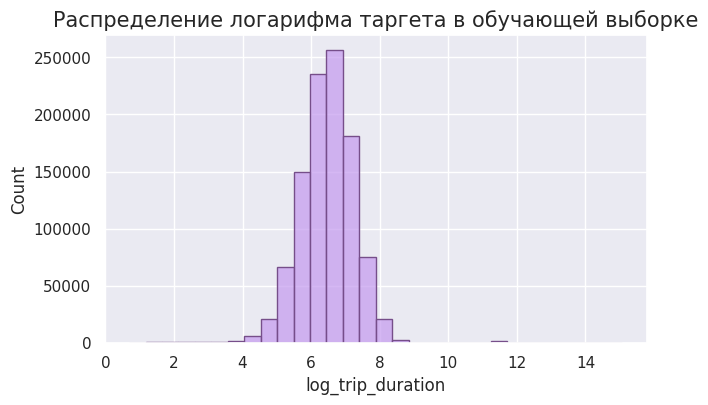

In [65]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Распределение логарифма таргета в обучающей выборке', fontsize=15)
sns.histplot(data_train.log_trip_duration,
             bins=30,
             ax=ax, 
             color='#c79fef',
             edgecolor='#764e8a');

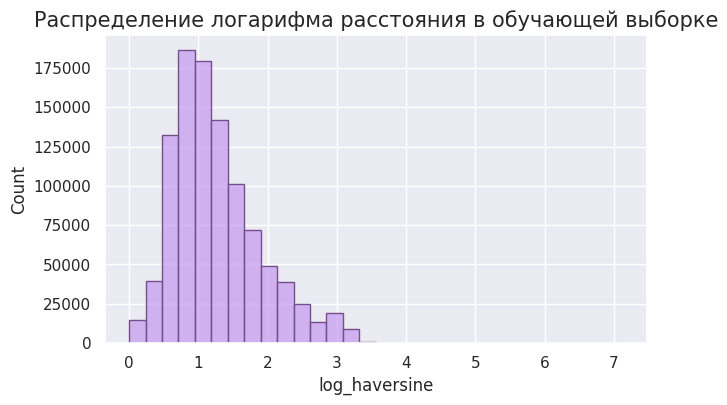

In [66]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Распределение логарифма расстояния в обучающей выборке', fontsize=15)
sns.histplot(X_train.log_haversine,
             bins=30,
             ax=ax, 
             color='#c79fef',
             edgecolor='#764e8a');

In [67]:
display(X_train['trip_duration'].quantile(.01))

index = X_train[X_train['trip_duration'] < X_train['trip_duration'].quantile(.01)].index
X_train = X_train.drop(index)
y_train = y_train.drop(index)

86.0

121.0

In [94]:
# Есть также данные с аномальной большим временем поездки
display(X_train['trip_duration'].max())

# Удалим также такие данные
display(X_train['trip_duration'].quantile(.99856))
index = X_train[X_train['trip_duration'] > X_train['trip_duration'].quantile(.99856)].index
X_train = X_train.drop(index)
y_train = y_train.drop(index)

3526282

4853.0

In [95]:
display(X_train['haversine'].quantile(.999995))

index = X_train[X_train['haversine'] > X_train['haversine'].quantile(.999995)].index

X_train = X_train.drop(index)
y_train = y_train.drop(index)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [112]:
# Можно объединить категории с аэропортами: сделать общие признаки "поездка из аэропорта" и "поездка в аэропорт"
def is_airport(airport1, aiport2, aiport3):
    return (airport1 == 1) | (aiport2 == 1) | (aiport3 == 1)

X_train['is_pickup_in_airport'] = is_airport(X_train['is_pickup_in_NA'], X_train['is_pickup_in_JFKA'], X_train['is_pickup_in_LGA']).astype(int)
X_test['is_pickup_in_airport'] = is_airport(X_test['is_pickup_in_NA'], X_test['is_pickup_in_JFKA'], X_test['is_pickup_in_LGA']).astype(int)
X_train['is_dropoff_in_airport'] = is_airport(X_train['is_dropoff_in_NA'], X_train['is_dropoff_in_JFKA'], X_train['is_dropoff_in_LGA']).astype(int)
X_test['is_dropoff_in_airport'] = is_airport(X_test['is_dropoff_in_NA'], X_test['is_dropoff_in_JFKA'], X_test['is_dropoff_in_LGA']).astype(int)


In [118]:
# Также можно объединить признаки 'is_snowstorm' и 'is_memorial_day'
def is_abnormal_period(period1, period2):
    return (period1 == 1) | (period2 == 1)

X_train['is_abnormal_period'] = is_abnormal_period(X_train['is_snowstorm'], X_train['is_memorial_day']).astype(int)
X_test['is_abnormal_period'] = is_abnormal_period(X_test['is_snowstorm'], X_test['is_memorial_day']).astype(int)

In [119]:
X_train.columns

Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'day_of_year',
       'day_of_week', 'hour', 'month', 'is_snowstorm', 'is_memorial_day',
       'haversine', 'log_haversine', 'is_traffic_jam', 'is_empty_road',
       'is_pickup_in_JFKA', 'is_dropoff_in_JFKA', 'is_pickup_in_LGA',
       'is_dropoff_in_LGA', 'is_pickup_in_NA', 'is_dropoff_in_NA',
       'pickup_coordinate', 'dropoff_coordinate', 'is_popular_pair',
       'is_pickup_in_airport', 'is_dropoff_in_airport', 'is_abnormal_period'],
      dtype='object')

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [120]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 
                 'is_abnormal_period', 'log_haversine', 'is_traffic_jam',
                 'is_empty_road','is_pickup_in_airport','is_dropoff_in_airport',
                 'pickup_coordinate', 'dropoff_coordinate'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 
                    'is_abnormal_period', 'is_traffic_jam',  'is_empty_road',
                    'is_pickup_in_airport', 'is_dropoff_in_airport'])

numeric_features = list(['log_haversine', 'pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4897


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [139]:
features_count = len(features)
display(features_count)

12

In [142]:
def count_after_one_hot(features):
    result = 0
    for feature in features:
        result += X_train[feature].unique().shape[0]
    return result

features_count_after_one_hot = len(numeric_features) + count_after_one_hot(categorical)


display(features_count_after_one_hot)

232

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [143]:
from sklearn.linear_model import Lasso


features = list(['day_of_year','day_of_week', 'hour', 'month', 
                 'is_abnormal_period', 'log_haversine', 'is_traffic_jam',
                 'is_empty_road','is_pickup_in_airport','is_dropoff_in_airport',
                 'pickup_coordinate', 'dropoff_coordinate'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 
                    'is_abnormal_period', 'is_traffic_jam',  'is_empty_road',
                    'is_pickup_in_airport', 'is_dropoff_in_airport'])

numeric_features = list(['log_haversine', 'pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7946


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [152]:
# X_train_1, X_valid, y_train_1, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[numeric_features])
# X_test_scaled = scaler.transform(X_test[numeric_features])

# X_train_scaled

# alphas = np.logspace(-2, 3, 20)
# searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
# searcher.fit(X_train_scaled, y_train)

# best_alpha = searcher.best_params_["alpha"]

array([[ 0.41900383, -0.23199718, -1.10508144],
       [ 0.78695189, -0.22349086,  1.0326739 ],
       [ 1.75277856,  0.1422809 ,  0.50367003],
       ...,
       [-1.15045767,  0.86531812,  0.73556214],
       [-0.03717463,  1.57984901,  1.96024232],
       [-0.84765068, -1.66956529, -1.12682133]])

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [75]:
pairs = X_train.groupby(['pickup_coordinate', 'dropoff_coordinate']).count().reset_index().sort_values(by='id', ascending=False)

popular_pairs = set(zip(pairs['pickup_coordinate'].head(100), pairs['dropoff_coordinate'].head(100)))
# list(zip(df['lat'],df['lon']))

# display(popular_pairs)

def is_popular_pair(pickup_coordinate, dropoff_coordinate):
#     return np.isin(tuple((pickup_coordinate, dropoff_coordinate)), popular_pairs)
    return (pickup_coordinate, dropoff_coordinate) in popular_pairs

# display(is_popular_pair(522, 523))


X_train['is_popular_pair'] = X_train.apply(lambda x: is_popular_pair(x['pickup_coordinate'], x['dropoff_coordinate']), axis=1).astype(int)
X_test['is_popular_pair'] = X_test.apply(lambda x: is_popular_pair(x['pickup_coordinate'], x['dropoff_coordinate']), axis=1).astype(int)



Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [144]:
features = list(['day_of_year','day_of_week', 'hour', 'month', 
                 'is_abnormal_period', 'log_haversine', 'is_traffic_jam',
                 'is_empty_road','is_pickup_in_airport','is_dropoff_in_airport',
                 'pickup_coordinate', 'dropoff_coordinate', 'is_popular_pair'])

categorical = list(['day_of_year','day_of_week', 'hour', 'month', 
                    'is_abnormal_period', 'is_traffic_jam',  'is_empty_road',
                    'is_pickup_in_airport', 'is_dropoff_in_airport', 'is_popular_pair'])

numeric_features = list(['log_haversine', 'pickup_coordinate', 'dropoff_coordinate'])

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4909


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [78]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.